## Árvores de regressão - exercícios 02 - Vivian Sant'Anna

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [23]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [22]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [26]:
# Configuração para visualização
%matplotlib inline
sns.set()



In [33]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testar diferentes profundidades de árvores
max_depth_range = range(1, 20)
mse_scores = []

for depth in max_depth_range:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)



Text(0.5, 1.0, 'MSE por Profundidade da Árvore')

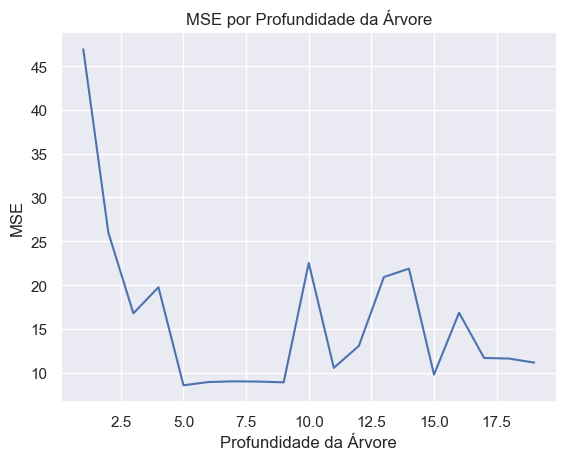

In [28]:
# Plotar o erro em função da profundidade da árvore
plt.plot(max_depth_range, mse_scores)
plt.xlabel('Profundidade da Árvore')
plt.ylabel('MSE')
plt.title('MSE por Profundidade da Árvore')



In [34]:
# Encontrar a profundidade ótima
optimal_depth = max_depth_range[mse_scores.index(min(mse_scores))]
print(f'Profundidade ótima: {optimal_depth}')



Profundidade ótima: 5


In [35]:
# Treinar o modelo final com a profundidade ótima
final_regressor = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
final_regressor.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Visualizar a árvore
plt.figure(figsize=(20,10))
tree.plot_tree(final_regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.show()

# Avaliar o modelo final no conjunto de teste
final_pred = final_regressor.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
print(f'MSE do modelo final: {final_mse}')


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

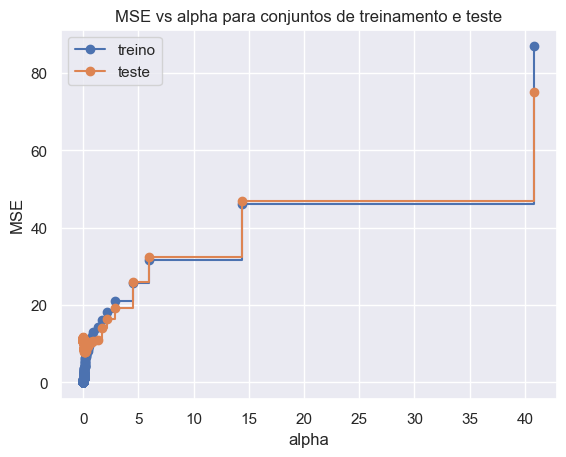

Alpha ótimo: 0.0843187123859524
MSE com alpha ótimo: 7.752956057865049


In [36]:
from sklearn.model_selection import cross_val_score

# Treinar a árvore de decisão sem limites de profundidade para obter a árvore completa
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Obter os valores CCP-Alpha
path = tree_regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Treinar uma árvore de decisão para cada alpha e avaliar sua performance
regressors = []
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)

# Plotar a acurácia da árvore em função do alpha para treino e teste
train_scores = [mean_squared_error(y_train, regressor.predict(X_train)) for regressor in regressors]
test_scores = [mean_squared_error(y_test, regressor.predict(X_test)) for regressor in regressors]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs alpha para conjuntos de treinamento e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

# Encontrar o alpha ótimo (excluindo o último valor de alpha que corresponde à árvore apenas com o nó raiz)
ccp_alpha_optimal = ccp_alphas[test_scores.index(min(test_scores[:-1]))]
print(f'Alpha ótimo: {ccp_alpha_optimal}')

# Treinar e avaliar a árvore usando o alpha ótimo
regressor_optimal = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha_optimal)
regressor_optimal.fit(X_train, y_train)
y_pred_optimal = regressor_optimal.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
print(f'MSE com alpha ótimo: {mse_optimal}')


Este valor de MSE sugere que, em média, as previsões do valor do imóvel estão dentro de uma margem de erro razoável em relação aos valores reais, tornando o modelo potencialmente útil para previsões práticas nesse contexto.

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [42]:
# Lista para armazenar as árvores treinadas
treed_regressors = []

# Treinar uma árvore de decisão para cada valor de alpha
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)
    # Adicionar a árvore treinada à lista
    treed_regressors.append(regressor)

# Agora, 'treed_regressors' contém todas as árvores treinadas, uma para cada valor de CCP-Alpha


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [39]:
# Lista para armazenar os MSEs de cada árvore
mse_scores = []

# Calcular o MSE para cada árvore na lista
for regressor in treed_regressors:
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Agora, 'mse_scores' contém os MSEs correspondentes a cada árvore em 'treed_regressors'


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

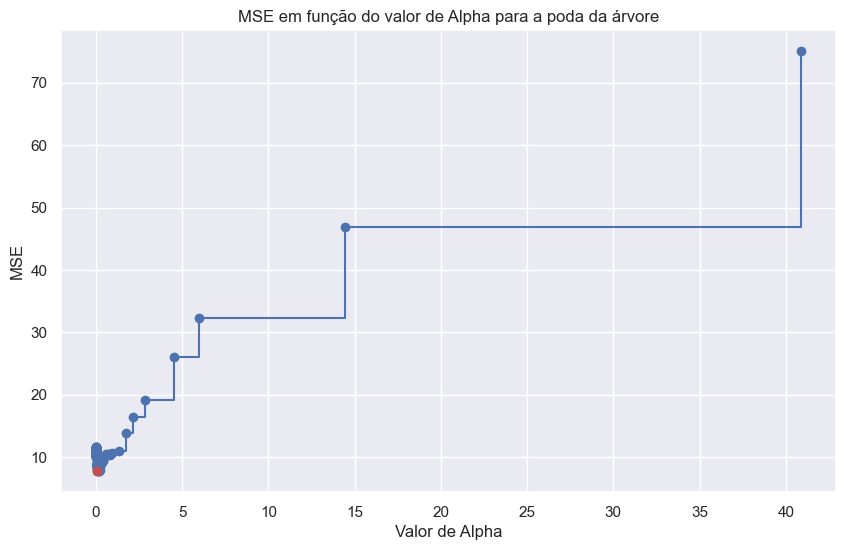

Valor de Alpha perto do ponto de mínimo MSE: 0.0843187123859524


In [40]:

import matplotlib.pyplot as plt

# Plotar o MSE em função do CCP-Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_scores, marker='o', drawstyle="steps-post")
plt.xlabel('Valor de Alpha')
plt.ylabel('MSE')
plt.title('MSE em função do valor de Alpha para a poda da árvore')

# Encontrar o índice do menor MSE, excluindo o último valor para evitar a árvore com apenas um nó
min_mse_index = mse_scores.index(min(mse_scores[:-1]))

# Destacar o ponto de mínimo MSE no gráfico
plt.plot(ccp_alphas[min_mse_index], mse_scores[min_mse_index], 'ro')  # 'ro' para marcar com um círculo vermelho

# Mostrar o gráfico
plt.show()

# Imprimir o valor de alpha correspondente ao menor MSE
print(f'Valor de Alpha perto do ponto de mínimo MSE: {ccp_alphas[min_mse_index]}')


O valor de CCP-Alpha aproximado de 0.0843, que levou ao menor MSE no conjunto de teste, indica a poda ótima da árvore de decisão, equilibrando complexidade e generalização. Este ponto de poda minimiza o overfitting, mantendo a árvore suficientemente detalhada para capturar as relações essenciais nos dados, sem ser excessivamente complexa. Usar este valor de alpha resulta em um modelo mais simples, eficaz e generalizável, evitando tanto o underfitting quanto o overfitting, conforme evidenciado pelo baixo MSE obtido.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [43]:
# Calcular R-quadrado no conjunto de teste
r_squared = regressor_optimal.score(X_test, y_test)

print(f'R-quadrado: {r_squared}')


R-quadrado: 0.8942785204342252


### 7. Visualize esta árvore.

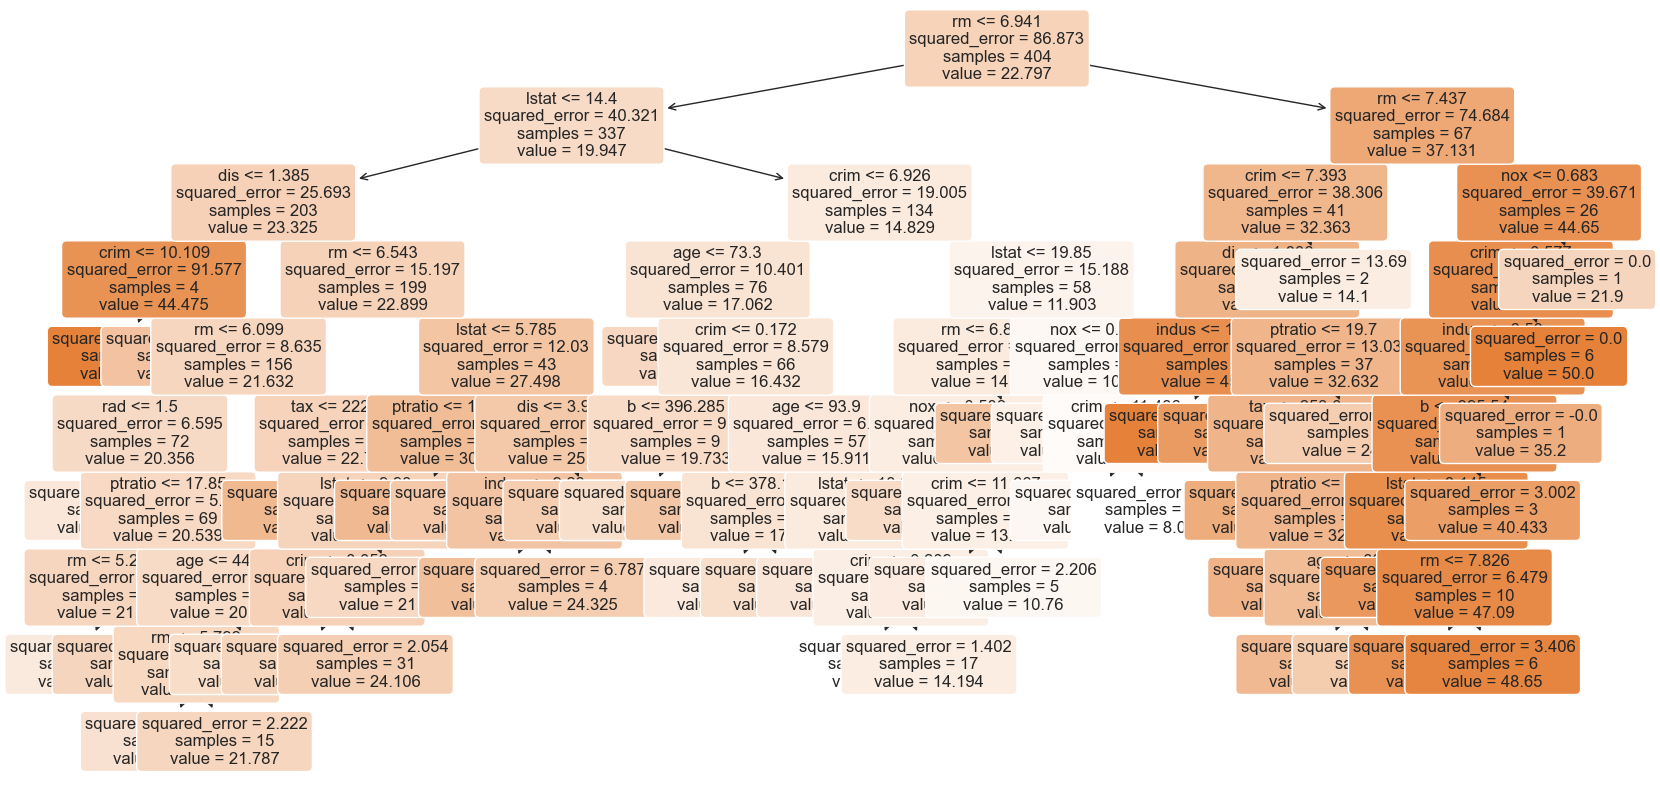

In [46]:
# Configuração para uma visualização melhor
plt.figure(figsize=(20,10))

# Converter X.columns para uma lista
feature_names_list = X.columns.tolist()

# Visualizar a árvore com feature_names como uma lista
tree.plot_tree(regressor_optimal, 
               filled=True, 
               feature_names=feature_names_list, 
               rounded=True, 
               fontsize=12)

# Mostrar a árvore
plt.show()